In [1008]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

## Load Training Data

In [1009]:
train_dataset = pd.read_csv("/Users/andreasalinetti/Documents/HACK4SDS/Dataset_DAY1/Data/train_set.csv", delimiter=';')

In [1010]:
train_dataset.head() 

,application_ID,decision_date,company_ID,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info,days_to_default,target
0,a1Q7R00000ej2yjUAA,2021-11-30,7256587870,10,3,NaN,NaN,NaN,NaN,MISSING,15,TP,SR,Servizi,"0,464636707194417","0,0125934084914631",0,"0,416001808268284",1,410,True,Sicilia,Isole,2,0,0,0,0,0,0,0,0,0,"0,25","0,176974593495935","0,00211193175908977","0,179073170731707","0,172031707317073",1,0,1,1,0,0,0,0,522,1
1,a1Q2X00000ZWC5LUAX,2020-10-06,6178307100,7,3,NaN,NaN,NaN,NaN,H,5,CA,RS,Costruzioni e materiali per costruzioni,"0,372340425531915","0,115384615384615","0,235955056179775","0,484042553191489",1,208,True,Sardegna,Isole,3,0,0,0,0,0,0,0,0,0,0,"0,151754006410256","0,00680628616351487","0,164754807692308","0,146384615384615",1,0,1,1,2,0,2,2,1498,0
2,a1Q2X00000XcCCQUA3,2020-02-11,7692855390,7,3,NaN,NaN,NaN,NaN,MISSING,5,LE,SR,Distribuzione,"0,27","0,00636942675159236","0,359375","0,125","0,375",471,False,Puglia,Sud,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,779,1
3,a1Q7R00000ejSs3UAE,2022-01-18,5752241730,8,2,NaN,NaN,NaN,NaN,MISSING,6,RM,SR,Servizi,"0,419928825622776","0,152173913043478","0,136150234741784","0,765124555160142","0,0588235294117647",598,True,Lazio,Centro,3,0,0,0,0,0,0,0,0,0,0,"0,0250836120401338","0,0261989783210917","0,0501672240802676","0,0501672240802676",1,0,1,1,"0,5","0,522232967867094",1,0,1498,0
4,a1Q7R00000eiRidUAE,2021-09-16,7533506540,4,1,NaN,NaN,NaN,NaN,MISSING,5,PD,SR,Servizi,"0,526315789473684","0,0833333333333333","0,233333333333333","0,197368421052632","0,75",108,False,Veneto,Nord-est,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1498,0


## Analizing Data

In [1011]:
import seaborn as sns

In [1012]:
train_dataset.describe()

,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,age,last_statement_age,max_count_enti_affidanti,last_count_enti_affidanti,max_count_numero_prima_info,last_count_numero_prima_info,days_to_default,target
count,32032.000000,32032.000000,4544.000000,4544.000000,4824.000000,4824.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000
mean,6.772040,1.942433,9.286532,5.891505,6.039594,6.168947,8.972715,1.824894,2.928571,2.691964,1.146354,0.976773,1281.800356,0.215222
std,1.764166,0.786342,2.760645,1.244978,1.302913,1.343487,9.003956,0.621009,3.321439,3.105271,1.494643,1.314287,426.997217,0.410983
min,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,7.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1498.000000,0.000000
50%,6.000000,2.000000,9.000000,6.000000,6.000000,6.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1498.000000,0.000000
75%,8.000000,3.000000,10.000000,7.000000,7.000000,7.000000,11.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1498.000000,0.000000
max,10.000000,3.000000,20.000000,10.000000,10.000000,10.000000,106.000000,7.000000,50.000000,45.000000,12.000000,12.000000,1498.000000,1.000000


In [1013]:
#train_dataset.values.sum()

<Axes: xlabel='external_score_ver03', ylabel='count'>

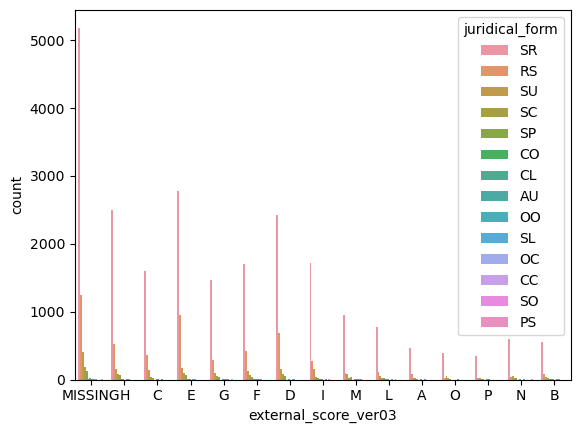

In [1014]:
sns.countplot(x='external_score_ver03', hue= 'juridical_form', data= train_dataset)

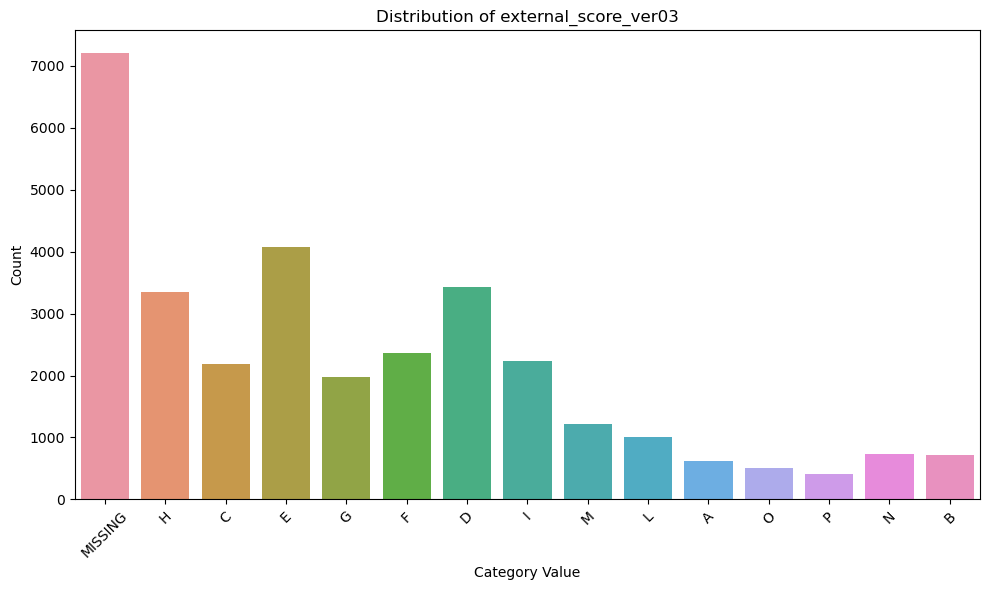

In [1015]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv("your_dataset.csv")

# Plot the distribution using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=train_dataset, x='external_score_ver03')
plt.xlabel('Category Value')
plt.ylabel('Count')
plt.title('Distribution of external_score_ver03')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

## <font color="yellow"> Clean and encode Data

#### Drop unneeded columns

In [1016]:
## drop features
def Drop_unneed_columns(test, dataset):
    cols= ['days_to_default', 'application_ID', 'decision_date', 'company_ID']
    if test:
        cols.remove('days_to_default')
        dataset= dataset.drop(columns=cols)
    else:
        dataset= dataset.drop(columns=cols)
    return dataset


#### Find columns with to many Nan's values

In [1017]:
def Nan_values(dataset):
    column_names = dataset.columns.tolist()
    drop_columns = []
    for name in column_names:
        nan_count = dataset[name].isna().sum()
        print(f"column {name}: {nan_count}")
        if (nan_count/28000) > 0.5:
            print(f"Number of NaN values in column '{name}': {nan_count}")
            drop_columns.append(name)
    return drop_columns

#### Label enconding

In [1018]:
def Replace_cate_to_value(column_name, dataset):
    # Extract categories

    # Extract unique category names from the column
    unique_categories = dataset[column_name].unique()

    # convert 'numpy.ndarray' in to a python list
    l = unique_categories.tolist()
    
    if 'MISSING' in l:
        l.remove('MISSING')
        l.sort(reverse=True)
    # print(unique_categories)

    # print(f"remove{l}")
    dic = { l[i]:i+1 for i in range(0, len(l))}

    # dic = {}

    # for name in unique_categories:
    #     if name != "MISSING":
    #         dic{}
    # print(dic)

    # Replace values in the column based on the dictionary mapping
    dataset[column_name] = dataset[column_name].replace(dic)
    return dic, dataset

In [1019]:
def Category_values(dataset):
    column_names = ['industry_sector', 'region', 'geo_area','external_score_ver03', 'province','juridical_form']
    dic = {}
    for column_name in column_names:
        category_dic, dataset = Replace_cate_to_value(column_name, dataset)
        dic[column_name] = category_dic
    return dic, dataset

#### Replace True and False values to numerical values in Columns

In [1020]:
def Replace_bool_toNumbers(dataset):
    dataset['cr_available'] = [int(dataset['cr_available'][i]) for i in range(len(dataset['cr_available']))]
    dataset['cr_available']
    return dataset

#### Mean of external score var 03 

In [1021]:
def mean_var03(dataset):
    s0, s1, c0, c1 = 0,0,0,0
    # unique_labels = dataset['target'].unique()
    for index, row in dataset.iterrows():
        if row['external_score_ver03'] != 'MISSING':
            if row['target'] == 0:
                s0 += row['external_score_ver03']
                c0 +=1
            elif row['target'] == 1:
                s1 +=  row['external_score_ver03']
                c1 += 1

    m0 = round(s0/c0)
    m1 = round(s1/c1)
    print(m0)
    print(m1)
    return m0,m1


#### Replace MISSING values to Mean finded 

In [1022]:
def Replace_missing(dataset, m0, m1):
    # Assuming df is your DataFrame and 'column_to_change' is the column you want to change
    # 'condition_column' is the column based on which you want to change the content
    dataset.loc[(dataset['target'] == 1) & (dataset['external_score_ver03'] == 'MISSING'), 'external_score_ver03'] = m1
    dataset.loc[(dataset['target'] == 0) & (dataset['external_score_ver03'] == 'MISSING'), 'external_score_ver03'] = m0
    dataset['external_score_ver03']

    # For example, if you want to change the content of 'column_to_change' to 'new_value' where 'condition_column' is True
    # Replace 'new_value', 'column_to_change', and 'condition_column' with your actual values
    return dataset

## Main code for train dataset 

In [1023]:
# Drop columns 
train_dataset = Drop_unneed_columns(False,train_dataset)
drop_columns = Nan_values(train_dataset)
train_dataset = train_dataset.drop(columns=drop_columns)



column external_score_ver01: 0
column external_score_ver02: 0
column late_payment_score: 27488
Number of NaN values in column 'late_payment_score': 27488
column external_score_late_payment_integrated: 27488
Number of NaN values in column 'external_score_late_payment_integrated': 27488
column external_score_moderate: 27208
Number of NaN values in column 'external_score_moderate': 27208
column external_score_adverse: 27208
Number of NaN values in column 'external_score_adverse': 27208
column external_score_ver03: 0
column age: 0
column province: 2654
column juridical_form: 0
column industry_sector: 0
column gross_margin_ratio: 0
column core_income_ratio: 0
column cash_asset_ratio: 0
column consolidated_liabilities_ratio: 0
column tangible_assets_ratio: 0
column revenues: 0
column cr_available: 0
column region: 0
column geo_area: 0
column last_statement_age: 0
column overrun_freq_a_revoca_autoliquidanti: 0
column avg_tension_a_revoca_autoliquidanti: 0
column std_tension_a_revoca_autoliqui

In [1024]:
# replace bool values to numerical ones 
category_dics, train_dataset = Category_values(train_dataset)
train_dataset = Replace_bool_toNumbers(train_dataset)


In [1025]:
# v03 column with missing values 
m0, m1= mean_var03(train_dataset)
train_dataset = Replace_missing(train_dataset, m0, m1)

8
10


## <font color="yellow"> Normalise Datase

#### Replace the "," to ".", in such a way to pass from object to number

In [1026]:
def normalized_data(dataset):
    # Replace commas with periods in all columns
    dataset = dataset.replace(',', '.', regex=True)
    print(dataset.dtypes)
    dataset = dataset.astype('float32')

    # check if the dataset has any nan value
    has_nan_values = dataset.isna().any().any()

    if has_nan_values:
        print("DataFrame contains NaN values.")
    else:
        print("DataFrame does not contain any NaN values.")

    return dataset

#### Normalise Columns

## <font color="green"> Main code Normalise Dataset

In [1027]:
train_dataset = normalized_data(train_dataset)

external_score_ver01                      int64
external_score_ver02                      int64
external_score_ver03                      int64
age                                       int64
province                                  int64
juridical_form                            int64
industry_sector                           int64
gross_margin_ratio                       object
core_income_ratio                        object
cash_asset_ratio                         object
consolidated_liabilities_ratio           object
tangible_assets_ratio                    object
revenues                                 object
cr_available                              int64
region                                    int64
geo_area                                  int64
last_statement_age                        int64
overrun_freq_a_revoca_autoliquidanti     object
avg_tension_a_revoca_autoliquidanti      object
std_tension_a_revoca_autoliquidanti      object
max_tension_a_revoca_autoliquidanti     

In [1028]:
pd.set_option('display.max_columns', None)
train_dataset.head(30)

,external_score_ver01,external_score_ver02,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info,target
0,10.0,3.0,10.0,15.0,1.0,1.0,1.0,0.464637,0.012593,0.000000,0.416002,1.000000,410.0,1.0,1.0,1.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.176975,2.111932e-03,0.179073,0.172032,1.000000,0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,1.0
1,7.0,3.0,7.0,5.0,2.0,2.0,2.0,0.372340,0.115385,0.235955,0.484043,1.000000,208.0,1.0,2.0,1.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151754,6.806286e-03,0.164755,0.146385,1.000000,0.000000,1.0,1.0,2.000000,0.000000,2.0,2.0,0.0
2,7.0,3.0,10.0,5.0,3.0,1.0,3.0,0.270000,0.006369,0.359375,0.125000,0.375000,471.0,0.0,3.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
3,8.0,2.0,8.0,6.0,4.0,1.0,1.0,0.419929,0.152174,0.136150,0.765125,0.058824,598.0,1.0,4.0,3.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025084,2.619898e-02,0.050167,0.050167,1.000000,0.000000,1.0,1.0,0.500000,0.522233,1.0,0.0,0.0
4,4.0,1.0,8.0,5.0,5.0,1.0,1.0,0.526316,0.083333,0.233333,0.197368,0.750000,108.0,0.0,5.0,4.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
5,6.0,1.0,12.0,2.0,6.0,1.0,4.0,0.673177,0.026609,0.192248,0.252604,0.504065,2073.0,1.0,6.0,5.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.060680,3.722236e-02,0.146051,0.146051,2.250000,0.452267,3.0,3.0,2.916667,0.668558,4.0,1.0,0.0
6,7.0,3.0,10.0,3.0,7.0,2.0,1.0,1.666667,0.017544,0.615385,0.277778,0.000000,57.0,0.0,7.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,6.0,1.0,10.0,9.0,8.0,1.0,5.0,0.307391,0.010648,0.080271,0.157611,0.843066,12209.0,1.0,8.0,5.0,3.0,0.000000,0.458545,0.248584,0.790275,0.202147,0.027610,0.013843,0.045343,0.012444,0.000000,0.020232,2.002530e-02,0.040953,0.037795,6.000000,0.000000,6.0,6.0,0.250000,0.621582,2.0,2.0,1.0
8,10.0,3.0,10.0,2.0,9.0,1.0,2.0,0.457291,0.068892,0.000000,0.369089,1.000000,584.0,1.0,9.0,2.0,2.0,0.083333,12637.000000,43775.539062,151643.000000,1.000000,0.002856,0.009886,0.034247,0.034247,0.000000,0.094279,4.360371e-04,0.095017,0.095017,1.000000,0.000000,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
9,7.0,2.0,8.0,12.0,10.0,3.0,6.0,0.221461,-0.045290,0.051724,0.081050,0.715017,552.0,0.0,10.0,2.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


## <font color="yellow"> Model

In [1029]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from sklearn.model_selection import KFold

#### Quello che funziona 

In [1105]:
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)  
        self.fc2 = nn.Linear(8,4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc4 = nn.Linear(4, 1)  # Output layer with 1 neuron for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return torch.sigmoid(x)



accuracy_values = []
loss_values = []
X = train_dataset.iloc[:, :-1].to_numpy()
y = train_dataset.iloc[:, -1].to_numpy()

num_folds = 5
input_size = 39
num_epochs = 10
num_models = 11

kf = KFold(n_splits=num_folds, shuffle=True)

criterion = nn.BCELoss() 
l1_lambda = 0.001
l2_lambda = 0.001
fold_params = []

for model_index in range(num_models):

    for fold, (train_indices, val_indices) in enumerate(kf.split(X)):
        print(f'Fold {fold+1}/{num_folds}')

        # Split the data into training and validation sets
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        # Convert data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
        
        model = NeuralNetwork(input_size)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        # Train the neural network

        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor.view(-1, 1))
            loss_values.append(loss.item())

            l1_reg = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l1_reg = l1_reg + torch.norm(param, p=1)
            loss = loss + l1_lambda * l1_reg

            # L2 regularization
            l2_reg = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l2_reg = l2_reg + torch.norm(param, p=2)
            loss = loss + l2_lambda * l2_reg
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        fold_params.append(model.state_dict())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Fold:{fold}')

        # Evaluate the model
        with torch.no_grad():
            # Predict probabilities on the test set
            outputs = model(X_val_tensor)
            predicted = (outputs >= 0.5).float()
            
            # Calculate accuracy
            accuracy = (predicted == y_val_tensor.view(-1, 1)).float().mean()
            accuracy_values.append(accuracy)
            print(f'Accuracy on test set: {accuracy.item()*100:.2f}%')
    torch.save(model.state_dict(), f'model_{model_index}.pth')

avg_params = {}

for key in fold_params[0].keys():
    avg_params[key] = torch.stack([params[key] for params in fold_params]).mean(dim=0)

# Create a new model with the average parameters
average_model = NeuralNetwork(input_size)
average_model.load_state_dict(avg_params)
print(f'Averagea ccuracy on test set: {np.array(accuracy_values).mean()*100:.2f}%')


Fold 1/5
Epoch [10/10], Loss: 15.2580, Fold:0
Accuracy on test set: 37.90%
Fold 2/5


Epoch [10/10], Loss: 8.8676, Fold:1
Accuracy on test set: 38.47%
Fold 3/5
Epoch [10/10], Loss: 4.2541, Fold:2
Accuracy on test set: 74.06%
Fold 4/5
Epoch [10/10], Loss: 9.4256, Fold:3
Accuracy on test set: 22.59%
Fold 5/5
Epoch [10/10], Loss: 24.8320, Fold:4
Accuracy on test set: 48.78%
Fold 1/5
Epoch [10/10], Loss: 7.8450, Fold:0
Accuracy on test set: 59.26%
Fold 2/5
Epoch [10/10], Loss: 7.2414, Fold:1
Accuracy on test set: 67.08%
Fold 3/5
Epoch [10/10], Loss: 11.3303, Fold:2
Accuracy on test set: 63.94%
Fold 4/5
Epoch [10/10], Loss: 8.7221, Fold:3
Accuracy on test set: 40.46%
Fold 5/5
Epoch [10/10], Loss: 5.4323, Fold:4
Accuracy on test set: 69.68%
Fold 1/5
Epoch [10/10], Loss: 5.4895, Fold:0
Accuracy on test set: 73.14%
Fold 2/5
Epoch [10/10], Loss: 6.6339, Fold:1
Accuracy on test set: 24.22%
Fold 3/5
Epoch [10/10], Loss: 5.9665, Fold:2
Accuracy on test set: 56.21%
Fold 4/5
Epoch [10/10], Loss: 12.0504, Fold:3
Accuracy on test set: 60.21%
Fold 5/5
Epoch [10/10], Loss: 11.4873, Fold:

#### Plot Loss Chart

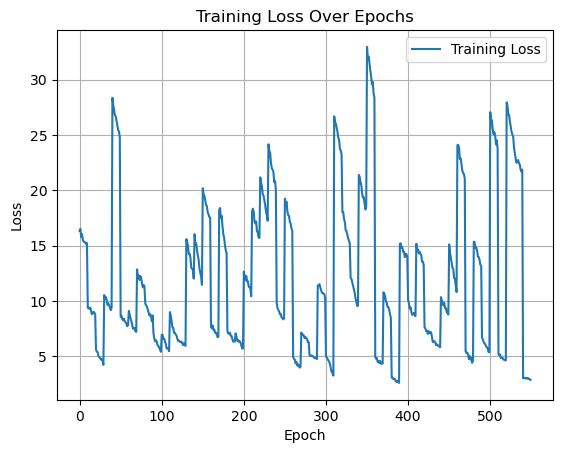

In [1106]:
import matplotlib.pyplot as plt

# Plot the loss values
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

#### Calculated F1 score

In [1107]:
from sklearn.metrics import f1_score

true_labels = y_val_tensor.numpy().astype(int)
predicted_labels = 1-(predicted.numpy())
# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print(f'F1 score on test set: {f1:.4f}')

F1 score on test set: 0.1017


## <font color="yellow"> Test Dataset

In [1108]:
from sklearn.impute import SimpleImputer

#### Load Dataset

In [1109]:
test_dataset = pd.read_csv("/Users/andreasalinetti/Documents/HACK4SDS/Dataset_DAY1/Data/test_set.csv", delimiter=';')


In [1110]:
test_dataset.head()

,application_ID,decision_date,company_ID,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info
0,a1Q7R00000ZWFXwUAP,2020-10-12,1321219660,5,1,8.0,5.0,6.0,7.0,D,6,PD,SR,Distribuzione,"0,0698090692124105","-0,0133630289532294","0,0454201362604088","0,39200477326969",1,449,True,Veneto,Nord-est,1,"0,166666666666667","0,554859166666667","0,146890245697462","0,83594","0,60264","0,123576651818857","0,032714976770036","0,186178173719376","0,134218262806236","0,333333333333333","1,27369933184855","0,028642038445761","1,32464142538975","1,32464142538975","1,16666666666667","0,389249472080761",2,2,"1,08333333333333","0,288675134594813",2,1
1,a1Q7R00000ZWJX2UAP,2020-11-12,1420617490,8,1,NaN,NaN,NaN,NaN,F,46,IS,SR,Altri beni di consumo,"0,169093471113199","0,00206611570247934","0,155359917141378","0,54062940347581","0,95959595959596",1402,False,Molise,Sud,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1
2,a1Q7R00000a3E9nUAE,2021-07-05,137667970,8,1,NaN,NaN,NaN,NaN,I,51,CB,SR,Chimica di base e intermedi,"0,0589433072553853","0,0306451612903226","0,0043021855102392","0,640767334690816","0,980113636363636",1254,True,Molise,Sud,2,"0,833333333333333","0,941108491613086","0,0992007690627971","1,0864",1,"0,137654704944179","0,115573259414523","0,267955342902711","0,0119617224880383",0,"0,212708532695375","0,100377623990215","0,33222009569378","0,320196172248804",3,0,3,3,"1,91666666666667","0,288675134594813",2,2
3,a1Q7R00000ZWRR6UAP,2021-01-19,137667970,8,1,NaN,NaN,NaN,NaN,F,51,CB,SR,Chimica di base e intermedi,"0,0589433072553853","0,0306451612903226","0,0043021855102392","0,640767334690816","0,980113636363636",1254,True,Molise,Sud,2,"0,833333333333333","0,878429123495436","0,0566505328975202","0,972473824531666","0,903049655802421","0,252491959064328","0,0249197649236005","0,269318979266348","0,17658293460925",0,"0,14559735513025","0,0113414597444539","0,162240829346092","0,126861244019139",3,0,3,3,"1,91666666666667","0,288675134594813",2,2
4,a1Q7R00000g6DWvUAM,2022-05-09,2412739090,6,1,NaN,NaN,NaN,NaN,F,72,SS,SR,Alimentare,"0,135170603674541","-0,0755467196819085","0,0169851380042463","0,492125984251969","0,769345238095238",1463,True,Sardegna,Isole,2,0,"0,722863999082564","0,0605656113993484","0,816631566033492","0,761046273164548","0,284641717931192","0,0245101240633782","0,315383458646616","0,306924812030075",0,"0,38485640236956","0,0307032798267901","0,478388926862611","0,356901572112098",3,0,3,3,"2,08333333333333","0,288675134594813",3,3


#### Preprocess Test Dataset

In [1111]:
# Drop columns 
test_dataset = Drop_unneed_columns(True,test_dataset)
print(drop_columns)
test_dataset = test_dataset.drop(columns=drop_columns)

['late_payment_score', 'external_score_late_payment_integrated', 'external_score_moderate', 'external_score_adverse']


In [1112]:
print(test_dataset["juridical_form"].value_counts())

SR    7906
RS    1736
SU     527
SC     274
SP     163
CL      18
OO      17
SL      14
CO       9
CC       4
AU       3
SS       2
OC       2
SO       1
OS       1
PS       1
Name: juridical_form, dtype: int64


In [1113]:
print(category_dics["juridical_form"])
category_dics["juridical_form"]["SS"] = 15
category_dics["juridical_form"]["OS"] = 16
print(category_dics["juridical_form"])

{'SR': 1, 'RS': 2, 'SU': 3, 'SC': 4, 'SP': 5, 'CO': 6, 'CL': 7, 'AU': 8, 'OO': 9, 'SL': 10, 'OC': 11, 'CC': 12, 'SO': 13, 'PS': 14, 'SS': 15, 'OS': 16}
{'SR': 1, 'RS': 2, 'SU': 3, 'SC': 4, 'SP': 5, 'CO': 6, 'CL': 7, 'AU': 8, 'OO': 9, 'SL': 10, 'OC': 11, 'CC': 12, 'SO': 13, 'PS': 14, 'SS': 15, 'OS': 16}


In [1114]:
print(category_dics["juridical_form"])
for k,v in category_dics.items():
    test_dataset.replace({k:v}, inplace=True)


{'SR': 1, 'RS': 2, 'SU': 3, 'SC': 4, 'SP': 5, 'CO': 6, 'CL': 7, 'AU': 8, 'OO': 9, 'SL': 10, 'OC': 11, 'CC': 12, 'SO': 13, 'PS': 14, 'SS': 15, 'OS': 16}


In [1115]:
c = test_dataset["external_score_ver03"].value_counts()
print(c)

MISSING    2434
10         1415
7          1135
11         1113
9           804
6           752
12          689
8           667
4           385
5           297
3           240
13          225
14          215
2           168
1           139
Name: external_score_ver03, dtype: int64


In [1116]:
print(list(test_dataset.columns))

['external_score_ver01', 'external_score_ver02', 'external_score_ver03', 'age', 'province', 'juridical_form', 'industry_sector', 'gross_margin_ratio', 'core_income_ratio', 'cash_asset_ratio', 'consolidated_liabilities_ratio', 'tangible_assets_ratio', 'revenues', 'cr_available', 'region', 'geo_area', 'last_statement_age', 'overrun_freq_a_revoca_autoliquidanti', 'avg_tension_a_revoca_autoliquidanti', 'std_tension_a_revoca_autoliquidanti', 'max_tension_a_revoca_autoliquidanti', 'last_tension_a_revoca_autoliquidanti', 'avg_rel_used_a_revoca_autoliquidanti', 'std_rel_used_a_revoca_autoliquidanti', 'max_rel_used_a_revoca_autoliquidanti', 'last_rel_used_a_revoca_autoliquidanti', 'overrun_freq_a_scadenza', 'avg_rel_used_a_scadenza', 'std_rel_used_a_scadenza', 'max_rel_used_a_scadenza', 'last_rel_used_a_scadenza', 'avg_count_enti_affidanti', 'std_count_enti_affidanti', 'max_count_enti_affidanti', 'last_count_enti_affidanti', 'avg_count_numero_prima_info', 'std_count_numero_prima_info', 'max_cou

In [1117]:
# find columns with MISSING values 
columns = []
for column in list(test_dataset.columns):
    # Check if there is a value "MISSING" in the 'column_name' column
    missing_values = test_dataset[column] == 'MISSING'

    # Check if any row contains the value "MISSING" in the specified column
    if missing_values.any():
        print(f"'MISSING' in the column: {column}")
        columns.append(column)
    

'MISSING' in the column: external_score_ver03
'MISSING' in the column: province
'MISSING' in the column: region
'MISSING' in the column: geo_area


In [1118]:
# Sum values in the specified columns
dic = {}
for column in columns:
    column_name = column

    count = 0
    sum_values = 0
    # Iterate over the DataFrame
    for index, row in test_dataset.iterrows():
        # Access the value of the specified column for each row
        count +=1
        if isinstance(row[column_name], str):
            continue
        elif isinstance(row[column_name], int):
            sum_values += row[column_name]
    
    dic[column] = int(sum_values/count)

print(dic)
       

{'external_score_ver03': 6, 'province': 31, 'region': 7, 'geo_area': 3}


In [1119]:
def Replace_missing_test(dataset,val, column):
    # Assuming df is your DataFrame and 'column_to_change' is the column you want to change
    # 'condition_column' is the column based on which you want to change the content
    dataset.loc[(dataset[column] == 'MISSING'), column] = val


    # For example, if you want to change the content of 'column_to_change' to 'new_value' where 'condition_column' is True
    # Replace 'new_value', 'column_to_change', and 'condition_column' with your actual values
    return dataset

In [1120]:
for k,v in dic.items():
    test_dataset = Replace_missing_test(test_dataset,v,k)

In [1121]:
print(test_dataset["province"].value_counts())

4      1157
6      1044
27      877
39      316
7       300
       ... 
95       11
60       10
107       9
12        7
105       6
Name: province, Length: 107, dtype: int64


In [1122]:
c = test_dataset["external_score_ver03"].value_counts()
print(c)

6     3186
10    1415
7     1135
11    1113
9      804
12     689
8      667
4      385
5      297
3      240
13     225
14     215
2      168
1      139
Name: external_score_ver03, dtype: int64


In [1123]:

test_dataset = Replace_bool_toNumbers(test_dataset)

In [1124]:
pd.set_option('display.max_columns', None)
test_dataset.head()

,external_score_ver01,external_score_ver02,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info
0,5,1,11,6,5,1,3,"0,0698090692124105","-0,0133630289532294","0,0454201362604088","0,39200477326969",1,449,1,5,4,1,"0,166666666666667","0,554859166666667","0,146890245697462","0,83594","0,60264","0,123576651818857","0,032714976770036","0,186178173719376","0,134218262806236","0,333333333333333","1,27369933184855","0,028642038445761","1,32464142538975","1,32464142538975","1,16666666666667","0,389249472080761",2,2,"1,08333333333333","0,288675134594813",2,1
1,8,1,9,46,101,1,8,"0,169093471113199","0,00206611570247934","0,155359917141378","0,54062940347581","0,95959595959596",1402,0,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1
2,8,1,6,51,69,1,12,"0,0589433072553853","0,0306451612903226","0,0043021855102392","0,640767334690816","0,980113636363636",1254,1,18,2,2,"0,833333333333333","0,941108491613086","0,0992007690627971","1,0864",1,"0,137654704944179","0,115573259414523","0,267955342902711","0,0119617224880383",0,"0,212708532695375","0,100377623990215","0,33222009569378","0,320196172248804",3,0,3,3,"1,91666666666667","0,288675134594813",2,2
3,8,1,9,51,69,1,12,"0,0589433072553853","0,0306451612903226","0,0043021855102392","0,640767334690816","0,980113636363636",1254,1,18,2,2,"0,833333333333333","0,878429123495436","0,0566505328975202","0,972473824531666","0,903049655802421","0,252491959064328","0,0249197649236005","0,269318979266348","0,17658293460925",0,"0,14559735513025","0,0113414597444539","0,162240829346092","0,126861244019139",3,0,3,3,"1,91666666666667","0,288675134594813",2,2
4,6,1,9,72,51,1,15,"0,135170603674541","-0,0755467196819085","0,0169851380042463","0,492125984251969","0,769345238095238",1463,1,2,1,2,0,"0,722863999082564","0,0605656113993484","0,816631566033492","0,761046273164548","0,284641717931192","0,0245101240633782","0,315383458646616","0,306924812030075",0,"0,38485640236956","0,0307032798267901","0,478388926862611","0,356901572112098",3,0,3,3,"2,08333333333333","0,288675134594813",3,3


In [1125]:
## normalise test dataset 
def normalized_tdata(dataset):
    # Replace commas with periods in all columns
    dataset = dataset.replace(',', '.', regex=True)
    # print(dataset.dtypes)
    dataset = dataset.astype('float32')

    # check if the dataset has any nan value
    has_nan_values = dataset.isna().any().any()

    if has_nan_values:
        print("DataFrame contains NaN values.")
    else:
        print("DataFrame does not contain any NaN values.")

    return dataset
test_dataset = normalized_tdata(test_dataset)

DataFrame does not contain any NaN values.


In [1126]:
test_dataset.head()

,external_score_ver01,external_score_ver02,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info
0,5.0,1.0,11.0,6.0,5.0,1.0,3.0,0.069809,-0.013363,0.045420,0.392005,1.000000,449.0,1.0,5.0,4.0,1.0,0.166667,0.554859,0.146890,0.835940,0.602640,0.123577,0.032715,0.186178,0.134218,0.333333,1.273699,0.028642,1.324641,1.324641,1.166667,0.389249,2.0,2.0,1.083333,0.288675,2.0,1.0
1,8.0,1.0,9.0,46.0,101.0,1.0,8.0,0.169093,0.002066,0.155360,0.540629,0.959596,1402.0,0.0,18.0,2.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0,1.000000,0.000000,1.0,1.0
2,8.0,1.0,6.0,51.0,69.0,1.0,12.0,0.058943,0.030645,0.004302,0.640767,0.980114,1254.0,1.0,18.0,2.0,2.0,0.833333,0.941108,0.099201,1.086400,1.000000,0.137655,0.115573,0.267955,0.011962,0.000000,0.212709,0.100378,0.332220,0.320196,3.000000,0.000000,3.0,3.0,1.916667,0.288675,2.0,2.0
3,8.0,1.0,9.0,51.0,69.0,1.0,12.0,0.058943,0.030645,0.004302,0.640767,0.980114,1254.0,1.0,18.0,2.0,2.0,0.833333,0.878429,0.056651,0.972474,0.903050,0.252492,0.024920,0.269319,0.176583,0.000000,0.145597,0.011341,0.162241,0.126861,3.000000,0.000000,3.0,3.0,1.916667,0.288675,2.0,2.0
4,6.0,1.0,9.0,72.0,51.0,1.0,15.0,0.135171,-0.075547,0.016985,0.492126,0.769345,1463.0,1.0,2.0,1.0,2.0,0.000000,0.722864,0.060566,0.816632,0.761046,0.284642,0.024510,0.315383,0.306925,0.000000,0.384856,0.030703,0.478389,0.356902,3.000000,0.000000,3.0,3.0,2.083333,0.288675,3.0,3.0


In [1127]:
print(test_dataset.shape)

(10678, 39)


## <font color="yellow"> Compute The Predictions

In [1128]:
results = []
for model_index in range(num_models):
    model_dict = torch.load(f'model_{model_index}.pth')
    model = NeuralNetwork(input_size) # Instantiate your model class here
    model.load_state_dict(model_dict)
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(test_dataset.values, dtype=torch.float32)
        outputs = model(X_test_tensor)
        predicted = (outputs >= 0.5).float().reshape(-1, 1)  # Reshape to (10678, 1)
        results.append(predicted)

results = np.concatenate(results, axis=1)  # Concatenate along axis 1 to get shape (10678, 5)

# Calculate mean along axis 1 to get shape (10678, 1)
results_mean = np.mean(results, axis=1).reshape(-1, 1)

print(results.shape)
print(results_mean.shape)


(10678, 11)
(10678, 1)


## Export The CSV File

In [1129]:
predicted_np = results_mean.flatten()
print(predicted_np.shape)
# Export the array to a CSV file with column name 'label' and each number on a different row
np.savetxt('prediction.csv', predicted_np, fmt='%d', delimiter=',', header='label', comments='')


(10678,)


## <font color="yellow">SVM model